In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

import matplotlib
matplotlib.rc('font',family='NanumGothic')
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df_oxidation = pd.read_csv('./dataset_origin/Oxidation.csv')
df_photo_soft = pd.read_csv('./dataset_origin/Photo_softbake.csv')
df_photo_litho = pd.read_csv('./dataset_origin/Photo_lithograpy.csv')
df_etching = pd.read_csv('./dataset_origin/Etching.csv')
df_ion = pd.read_csv('./dataset_origin/Ion_Implantation.csv')
df_inspect = pd.read_csv('./dataset_origin/final_data.csv')

print(len(df_inspect))

1702


In [2]:
path = []
for i in range(len(df_inspect)):
    temp = ''
    temp = str(df_oxidation['Ox_Chamber'][i]) + str(df_photo_soft['photo_soft_Chamber'][i]) + \
    str(df_photo_litho['lithography_Chamber'][i]) + str(df_etching['Etching_Chamber'][i]) + \
    str(df_ion['Chamber_Num'][i])
    path.append(temp)
    
print(len(path))

df_inspect['Path'] = path
df_inspect

1702


,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,...,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path
0,0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120.0,...,3.011187e+17,6.000012e+17,30795.934,103.433,854.0,154,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111
1,1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137.0,...,3.026639e+17,6.000008e+17,32135.618,105.552,895.0,156,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122
2,2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116.0,...,2.983347e+17,5.999989e+17,31057.895,102.598,898.0,152,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133
3,3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143.0,...,2.999225e+17,5.999997e+17,32140.566,102.963,879.0,155,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111
4,4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76.0,...,3.018136e+17,6.000004e+17,31986.009,101.419,882.0,155,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21.0,...,3.009325e+17,6.000003e+17,32248.621,101.503,868.0,152,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,33111
1698,1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22.0,...,3.006733e+17,6.000003e+17,32241.426,101.061,867.0,152,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,33222
1699,1701,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21.0,...,2.990013e+17,5.999991e+17,32245.574,101.506,868.0,152,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,33333
1700,1702,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20.0,...,2.992776e+17,6.000012e+17,32259.412,101.360,868.0,152,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,11133


In [3]:
all_path=set(path)
all_path=[s for s in all_path]
all_pd_path=pd.DataFrame(all_path)
all_pd_path

,0
0,12133
1,21133
2,32222
3,33122
4,13111
...,...
76,23111
77,11133
78,22122
79,31311


In [4]:
all_path=set(path)
all_path=[s for s in all_path]
all_pd_path=pd.DataFrame(all_path,columns=['Path'])
data_list=[]
for c in all_path:
    print(c)
    data_by_path= pd.DataFrame()
    for i in range(len(df_inspect)):
        if df_inspect.loc[i,['Path']][0]==c:
            a=pd.DataFrame(df_inspect.loc[i])
            data_by_path=pd.concat([data_by_path,a],axis=1)

    data_list.append(data_by_path.transpose())
    print(len(data_list))


12133
1
21133
2
32222
3
33122
4
13111
5
33333
6
23322
7
11233
8
12211
9
32322
10
32111
11
12111
12
33111
13
31233
14
13222
15
21311
16
12322
17
33133
18
21233
19
32333
20
13233
21
21211
22
23233
23
13122
24
11222
25
13333
26
12333
27
22222
28
33222
29
23122
30
21122
31
12222
32
11311
33
33211
34
12122
35
13133
36
23333
37
11322
38
23311
39
32311
40
11122
41
32211
42
31111
43
22111
44
13211
45
22322
46
22133
47
22233
48
11333
49
31122
50
31322
51
33311
52
32133
53
11211
54
22211
55
23133
56
23211
57
33322
58
21222
59
31222
60
22311
61
21333
62
12233
63
12311
64
13311
65
32122
66
31133
67
21322
68
23222
69
32233
70
13322
71
11111
72
21111
73
22333
74
31211
75
31333
76
23111
77
11133
78
22122
79
31311
80
33233
81


In [5]:
data_list[0]

,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,...,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path
31,31,NOLSM329135,1,Oxidation,wet,1120.91,H2O,31.37,0.215,76,...,3.01814e+17,6e+17,31986,101.419,882,155,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,12133
135,135,NOLSM379151,1,Oxidation,dry,1083.98,O2,39.27,0.217,135,...,3.00667e+17,5.99999e+17,32241.6,102.059,912,156,70,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 2 2 0 0 0 0 0 0 ...,12133
210,210,NOLSM4271622,1,Oxidation,wet,984.638,H2O,36.83,0.218,150,...,3.00034e+17,6e+17,31606.6,104.196,886,154,259,[['Scratch']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,12133
312,312,NOLSM4751816,1,Oxidation,dry,872.566,O2,22.19,0.218,225,...,2.99793e+17,6e+17,32297.6,104.702,917,157,57,none,[[0 0 0 0 0 0 0 0 0 0 1 1 2 1 2 2 0 0 0 0 0 0 ...,12133
380,380,NOLSM516203516,1,Oxidation,dry,887.739,O2,22.15,0.204,31,...,2.9995e+17,5.99999e+17,32299.4,103.155,907,155,93,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2 0 0 0 0 0 0 ...,12133
383,383,NOLSM519206519,1,Oxidation,dry,874.324,O2,22.17,0.202,32,...,3.00088e+17,6e+17,32298.3,103.594,919,155,69,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 2 1 2 0 0 0 0 0 0 ...,12133
386,386,NOLSM522209522,1,Oxidation,dry,886.611,O2,22.16,0.203,32,...,3.00981e+17,6e+17,32296.3,104.578,920,157,39,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 2 2 0 0 0 0 0 0 ...,12133
417,417,NOLSM5262013,1,Oxidation,dry,872.351,O2,22.18,0.213,220,...,3.01085e+17,6e+17,32299.5,103.629,923,155,51,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 0 0 0 0 0 0 ...,12133
542,542,NOLSM302330,1,Oxidation,wet,1104.13,H2O,32.84,0.206,165,...,3.00526e+17,5.99999e+17,31538.3,103.924,896,152,93,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,12133
545,545,NOLSM332633,1,Oxidation,wet,1120.31,H2O,31.7,0.21,167,...,3.01244e+17,6.00001e+17,32124.1,104.34,900,157,77,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,12133


In [6]:
count=0
for i in data_list:
    for j in range(len(i)):
        count+=1
print(count)

1702


In [8]:
all_list=[]
all_path=[]
for j in range(len(data_list)):
    target_mean = data_list[j]['Target'].mean()
    #표준편차 루트C
    target_std = math.sqrt(target_mean)

    #관리 상한(UCL)
    ucl = target_mean + 3*target_std
    cl = target_mean
    lcl = target_mean - 3*target_std
    control=True
    group=data_list[j]['Target']
    group_pd=pd.DataFrame(group)

    index_list = group_pd.index
    out_list=[]
    out_list_num=[]
    for i in index_list:
        if group_pd.loc[i,['Target']][0]>ucl or group_pd.loc[i,['Target']][0]<lcl:
            out_list.append(i)
            out_list_num.append(group_pd.loc[i,['Target']][0])
            print("out of control limit")
            control=False

    if control==True:
        print("All group within control limit")

    out_pd=pd.DataFrame(out_list)
    out_pd_num=pd.DataFrame(out_list_num)
    out_pd.columns=['index']
    out_pd_num.columns=['Target']
    all_list.append(len(out_pd))

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of contro

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of contro

In [127]:
data_dict={}
for i in range(len(data_list)):
    data_list[i]['Path']
    idx=data_list[i].index
    idx=idx[0]
    path = data_list[i]['Path'][idx]
    dum_Data=data_list[i].drop(['Path'],axis=1)
    #mean_Data=np.mean(data_list[i]['Target'])
    data_dict[path]=dum_Data

In [128]:
sum=0
for key,values in data_dict.items():
    sum+=len(values)
print(sum)

1702


In [129]:
length=[]
for keys,values in data_dict.items():
    length.append(len(values))
pd_length=pd.DataFrame(length,columns=['cnt'])
pd_length.sum()

cnt    1702
dtype: int64

In [130]:
pd.set_option('display.max_rows', None)

a=pd.DataFrame(all_list,columns=['Outlier'])
outlier_path=pd.concat([a,all_pd_path],axis=1)
outlier_path

out_path_cnt=pd.concat([outlier_path,pd_length],axis=1)
asd=out_path_cnt['Outlier']/out_path_cnt['cnt']
asd=pd.DataFrame(asd,columns=['outlier_ratio'])
asd
out_all_path=pd.concat([out_path_cnt,asd],axis=1)
out_all_path


,Outlier,Path,cnt,outlier_ratio
0,15,12133,29,0.517241
1,15,21133,29,0.517241
2,16,32222,43,0.372093
3,6,33122,9,0.666667
4,14,13111,29,0.482759
5,12,33333,26,0.461538
6,4,23322,9,0.444444
7,7,11233,12,0.583333
8,9,12211,12,0.750000
9,6,32322,9,0.666667


In [131]:
err_ratio=[]
for i in range(len(data_list)):
    error_ratio = data_list[i]['Target']
    target_sum=np.sum(error_ratio.values)
    wafer_num = len(data_list[i]['Target'])
    error_ratio2=target_sum/(wafer_num*2000)
    err_ratio.append(error_ratio2)
    
error_prob=pd.DataFrame(err_ratio,columns=['error_ratio'])
by_path_data=pd.concat([out_all_path,error_prob],axis=1)
by_path_data

,Outlier,Path,cnt,outlier_ratio,error_ratio
0,15,12133,29,0.517241,0.047052
1,15,21133,29,0.517241,0.047207
2,16,32222,43,0.372093,0.052907
3,6,33122,9,0.666667,0.036389
4,14,13111,29,0.482759,0.054569
5,12,33333,26,0.461538,0.045615
6,4,23322,9,0.444444,0.039444
7,7,11233,12,0.583333,0.070500
8,9,12211,12,0.750000,0.040125
9,6,32322,9,0.666667,0.060667


In [175]:
ss=by_path_data.sort_values(by='outlier_ratio',ascending=False)
ss

,Outlier,Path,cnt,outlier_ratio,error_ratio
74,9,31211,9,1.000000,0.083000
13,9,31233,9,1.000000,0.067389
80,7,33233,9,0.777778,0.041278
49,7,31122,9,0.777778,0.070778
8,9,12211,12,0.750000,0.040125
34,9,12122,12,0.750000,0.045500
70,9,13322,12,0.750000,0.048042
42,18,31111,26,0.692308,0.065481
20,8,13233,12,0.666667,0.043958
9,6,32322,9,0.666667,0.060667


In [176]:
reg = sm.OLS.from_formula("outlier_ratio~error_ratio",by_path_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          outlier_ratio   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     8.461
Date:                Wed, 02 Jun 2021   Prob (F-statistic):            0.00471
Time:                        14:05:47   Log-Likelihood:                 51.019
No. Observations:                  81   AIC:                            -98.04
Df Residuals:                      79   BIC:                            -93.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2959      0.082      3.598      0.001       0.132       0.460
error_ratio     4.6074      1.584      2.909      0.005       1.455       7.760
==============================================================================
Omnibus:                        5.624   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.118
Skew:                           0.452   Prob(JB):                       0.0774
Kurtosis:                       3.835   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

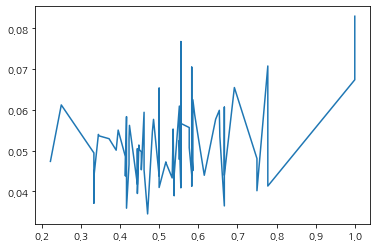

In [181]:
plt.plot(ss['outlier_ratio'].values,ss['error_ratio'].values)

In [179]:
err_sum=[]
for i in range(len(data_list)):
    error_num = data_list[i]['Target']
    target_sum=np.sum(error_num.values)
    err_sum.append(target_sum)
    
error_sum=pd.DataFrame(err_sum,columns=['error_sum'])
by_path_data2=pd.concat([by_path_data,error_sum],axis=1)
by_path_data2

,Outlier,Path,cnt,outlier_ratio,error_ratio,error_sum
0,15,12133,29,0.517241,0.047052,2729
1,15,21133,29,0.517241,0.047207,2738
2,16,32222,43,0.372093,0.052907,4550
3,6,33122,9,0.666667,0.036389,655
4,14,13111,29,0.482759,0.054569,3165
5,12,33333,26,0.461538,0.045615,2372
6,4,23322,9,0.444444,0.039444,710
7,7,11233,12,0.583333,0.070500,1692
8,9,12211,12,0.750000,0.040125,963
9,6,32322,9,0.666667,0.060667,1092


In [180]:
by_path_data2

,Outlier,Path,cnt,outlier_ratio,error_ratio,error_sum
0,15,12133,29,0.517241,0.047052,2729
1,15,21133,29,0.517241,0.047207,2738
2,16,32222,43,0.372093,0.052907,4550
3,6,33122,9,0.666667,0.036389,655
4,14,13111,29,0.482759,0.054569,3165
5,12,33333,26,0.461538,0.045615,2372
6,4,23322,9,0.444444,0.039444,710
7,7,11233,12,0.583333,0.070500,1692
8,9,12211,12,0.750000,0.040125,963
9,6,32322,9,0.666667,0.060667,1092


In [178]:
reg = sm.OLS.from_formula("cnt~error_ratio",by_path_data2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.04507
Date:                Wed, 02 Jun 2021   Prob (F-statistic):              0.832
Time:                        15:58:37   Log-Likelihood:                -305.00
No. Observations:                  81   AIC:                             614.0
Df Residuals:                      79   BIC:                             618.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.6194      6.666      2.943      0.004       6.351      32.888
error_ratio    27.2597    128.411      0.212      0.832    -228.335     282.855
==============================================================================
Omnibus:                        9.095   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                4.715
Skew:                           0.382   Prob(JB):                       0.0947
Kurtosis:                       2.098   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
reg = sm.OLS.from_formula("Outlier~error_ratio",by_path_data2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outlier   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.085
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.301
Time:                        19:38:23   Log-Likelihood:                -250.52
No. Observations:                  81   AIC:                             505.0
Df Residuals:                      79   BIC:                             509.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.3753      3.402      2.168      0.033       0.603      14.147
error_ratio    68.2786     65.540      1.042      0.301     -62.175     198.732
==============================================================================
Omnibus:                        3.255   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.007
Skew:                           0.471   Prob(JB):                        0.222
Kurtosis:                       2.934   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
reg = sm.OLS.from_formula("cnt~error_sum",by_path_data2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     912.0
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           3.81e-45
Time:                        19:25:14   Log-Likelihood:                -202.59
No. Observations:                  81   AIC:                             409.2
Df Residuals:                      79   BIC:                             414.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0449      0.710      2.878      0.005       0.631       3.459
error_sum      0.0088      0.000     30.199      0.000       0.008       0.009
==============================================================================
Omnibus:                        9.188   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               11.576
Skew:                           0.514   Prob(JB):                      0.00306
Kurtosis:                       4.540   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
over_200_num=[]
for i in range(len(data_list)):
    over_200=len(data_list[i][data_list[i]['Target']>=200])
    over_200_num.append(over_200)
    
over_num=pd.DataFrame(over_200_num,columns=['over_200'])
by_path_all=pd.concat([by_path_data2,over_num],axis=1)

In [156]:
by_path_all

,Outlier,Path,cnt,outlier_ratio,error_ratio,error_sum,over_200
0,15,12133,29,0.517241,0.047052,2729,2
1,15,21133,29,0.517241,0.047207,2738,0
2,16,32222,43,0.372093,0.052907,4550,2
3,6,33122,9,0.666667,0.036389,655,0
4,14,13111,29,0.482759,0.054569,3165,1
5,12,33333,26,0.461538,0.045615,2372,1
6,4,23322,9,0.444444,0.039444,710,0
7,7,11233,12,0.583333,0.070500,1692,2
8,9,12211,12,0.750000,0.040125,963,1
9,6,32322,9,0.666667,0.060667,1092,1


In [138]:
by_out=by_path_all.sort_values(by='Outlier',ascending=False)
by_out=by_out.reset_index(drop=True)

In [139]:
by_out=by_path_all.sort_values(by='Outlier',ascending=False)

,Outlier,Path,cnt,outlier_ratio,error_ratio,error_sum,over_200
0,29,22222,45,0.644444,0.057689,5192,8
1,23,13222,43,0.534884,0.050151,4313,2
2,21,21222,42,0.500000,0.053369,4483,4
3,19,22111,29,0.655172,0.053448,3100,2
4,18,31111,26,0.692308,0.065481,3405,4
5,17,31222,35,0.485714,0.057657,4036,3
6,17,23222,43,0.395349,0.055023,4732,4
7,17,31133,26,0.653846,0.059885,3114,3
8,17,12111,29,0.586207,0.045069,2614,0
9,17,21111,29,0.586207,0.062483,3624,4


In [160]:
by_out['error_ratio'].values
by_out['cnt'].values

array([45, 43, 42, 29, 26, 35, 43, 26, 29, 29, 41, 29, 43, 34, 24, 29, 30,
       26, 29, 29, 28, 26, 29, 26, 26, 29, 26, 33, 26, 26, 29, 22, 26, 29,
       26, 29, 29, 26, 26, 26, 26, 20, 29, 26,  9, 12, 12, 12,  9, 18, 12,
       12, 12, 12,  9, 12, 12, 12,  9,  9,  9, 12, 12, 11, 12,  9,  9,  9,
        9, 11, 12,  9,  9, 12,  9,  9, 12,  9,  9, 12,  9])

In [165]:
table=[[by_out['error_ratio'].values],[by_out['cnt'].values]]
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))

dof=80
chi-square test
chisq:1.543
p:1.000
degree of freedom:80


In [170]:
table=[[by_out['cnt'].values],[by_out['Outlier'].values]]
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))

dof=80
chi-square test
chisq:26.800
p:1.000
degree of freedom:80


In [143]:
num=10
up=by_out.loc[0:num]['over_200']
lo=by_out.loc[len(by_out)-num-1:len(by_out)]['over_200']

up_count=by_out.loc[0:num]['cnt']
lo_count=by_out.loc[len(by_out)-num-1:len(by_out)]['cnt']

In [144]:
table=[[lo_count.sum()-lo.sum(),lo.sum(0)],[up_count.sum()-up.sum(),up.sum()]]
table

[[107, 4], [351, 37]]

In [145]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

dof=1
[[101.87975952   9.12024048]
 [356.12024048  31.87975952]]
chi-square test
chisq:3.280
p:0.070
degree of freedom:1
expected_value::
[[101.88   9.12]
 [356.12  31.88]]


In [194]:
by_cnt=by_path_all.sort_values(by='cnt',ascending=False)
by_cnt

,Outlier,Path,cnt,outlier_ratio,error_ratio,error_sum,over_200
27,29,22222,45,0.644444,0.057689,5192,8
2,16,32222,43,0.372093,0.052907,4550,2
14,23,13222,43,0.534884,0.050151,4313,2
68,17,23222,43,0.395349,0.055023,4732,4
58,21,21222,42,0.500000,0.053369,4483,4
24,16,11222,41,0.390244,0.050085,4107,3
59,17,31222,35,0.485714,0.057657,4036,3
28,16,33222,34,0.470588,0.034426,2341,0
31,14,12222,33,0.424242,0.056182,3708,3
77,16,11133,30,0.533333,0.043267,2596,1


array([[1.        , 0.31103505],
       [0.31103505, 1.        ]])

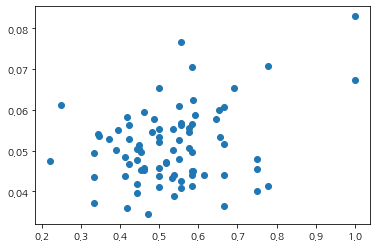

In [197]:
plt.scatter(by_cnt['outlier_ratio'].values,by_cnt['error_ratio'].values)
np.corrcoef(by_cnt['outlier_ratio'].values,by_cnt['error_ratio'].values)

array([[1.        , 0.11641337],
       [0.11641337, 1.        ]])

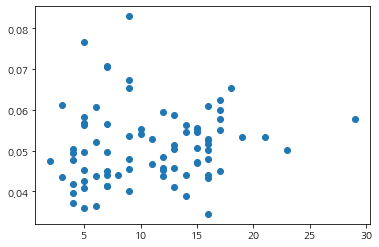

In [195]:
plt.scatter(by_cnt['Outlier'].values,by_cnt['error_ratio'].values)
np.corrcoef(by_cnt['Outlier'].values,by_cnt['error_ratio'].values)

array([[1.        , 0.02387717],
       [0.02387717, 1.        ]])

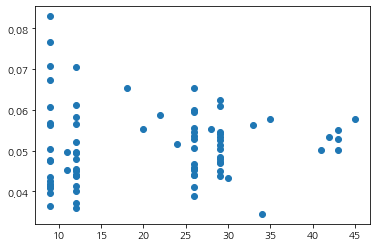

In [198]:
plt.scatter(by_cnt['cnt'].values,by_cnt['error_ratio'].values)
np.corrcoef(by_cnt['cnt'].values,by_cnt['error_ratio'].values)

array([[1.        , 0.90630469],
       [0.90630469, 1.        ]])

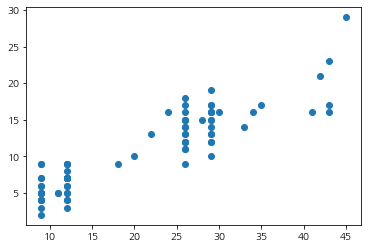

In [196]:
plt.scatter(by_cnt['cnt'].values,by_cnt['Outlier'].values)
np.corrcoef(by_cnt['cnt'].values,by_cnt['Outlier'].values)

array([[1.        , 0.31103505],
       [0.31103505, 1.        ]])

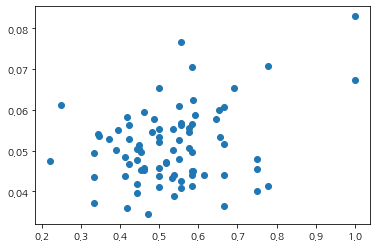

In [193]:
plt.scatter(by_cnt['outlier_ratio'].values,by_cnt['error_ratio'].values)
np.corrcoef(by_cnt['outlier_ratio'].values,by_cnt['error_ratio'].values)

Text(0.5, 1.0, '가동횟수에 따른 Outlier')

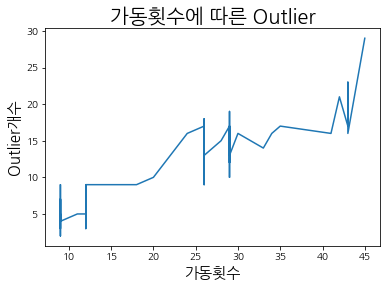

In [149]:
plt.plot(by_cnt['cnt'],by_cnt['Outlier'])
plt.xlabel('가동횟수',fontsize=15)
plt.ylabel('Outlier개수',fontsize=15)
plt.title('가동횟수에 따른 Outlier',fontsize=20)

Text(0.5, 1.0, '가동횟수에 따른 Target')

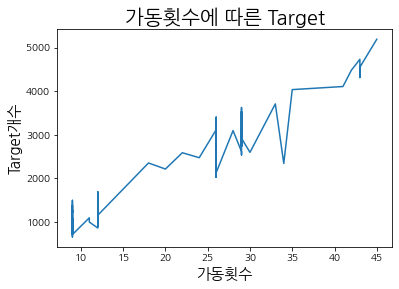

In [173]:
plt.plot(by_cnt['cnt'],by_cnt['error_sum'])
plt.xlabel('가동횟수',fontsize=15)
plt.ylabel('Target개수',fontsize=15)
plt.title('가동횟수에 따른 Target',fontsize=20)

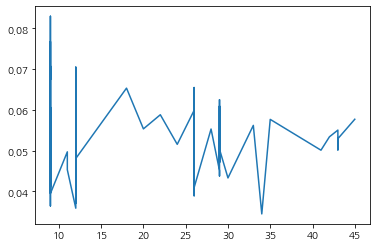

In [153]:
plt.plot(by_cnt['cnt'],by_cnt['error_ratio'])

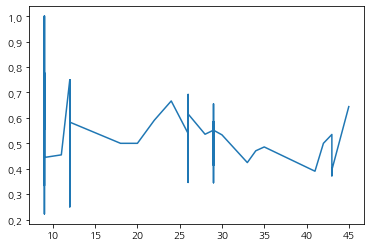

In [240]:
plt.plot(by_cnt['cnt'],by_cnt['ratio'])

In [241]:
by_Outlier=out_all_path.sort_values(by='Outlier',ascending=False)
by_Outlier=by_Outlier.reset_index(drop=True)
by_Outlier

,Outlier,Path,cnt,ratio,mean,sum
0,29,22222,45,0.644444,115.377778,5192
1,23,13222,43,0.534884,100.302326,4313
2,21,21222,42,0.500000,106.738095,4483
3,19,22111,29,0.655172,106.896552,3100
4,18,31111,26,0.692308,130.961538,3405
5,17,31133,26,0.653846,119.769231,3114
6,17,21111,29,0.586207,124.965517,3624
7,17,31222,35,0.485714,115.314286,4036
8,17,23222,43,0.395349,110.046512,4732
9,17,12111,29,0.586207,90.137931,2614


Text(0, 0.5, 'count')

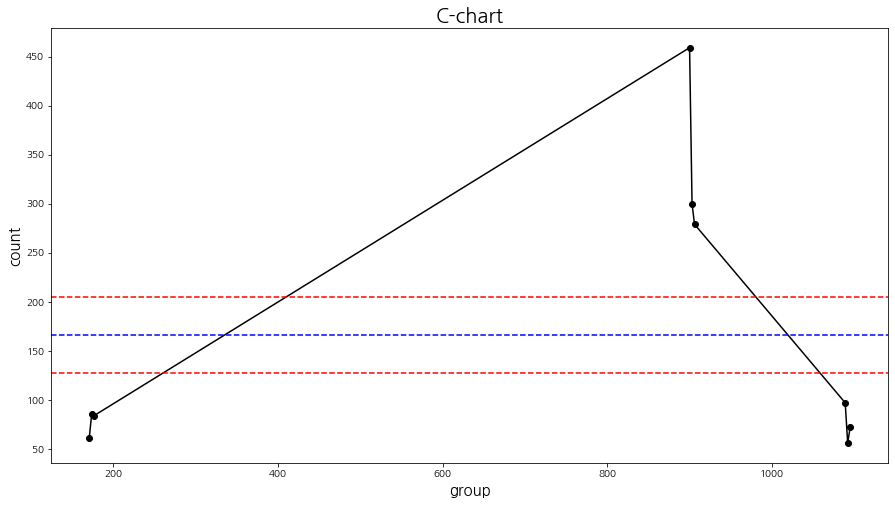

In [242]:

u_data=data_dict['31211']
target_mean = u_data['Target'].mean()
#표준편차 루트C
target_std = math.sqrt(target_mean)

#관리 상한(UCL)
ucl = target_mean + 3*target_std
cl = target_mean
lcl = target_mean - 3*target_std

fig = plt.figure(figsize=(15,8))
plt.plot(u_data['Target'],linestyle='-',marker='o',color='black')
plt.axhline(ucl,color='red',linestyle='dashed')
plt.axhline(lcl,color='red',linestyle='dashed')
plt.axhline(cl,color='blue',linestyle='dashed')

plt.title("C-chart",fontsize=20)
plt.xlabel("group",fontsize=15)
plt.ylabel("count",fontsize=15)

In [262]:
upper_path=by_Outlier.loc[0:13,['Path']]
lower_path=by_Outlier.loc[68:82,['Path']]

In [263]:
upper_path

,Path
0,22222
1,13222
2,21222
3,22111
4,31111
5,31133
6,21111
7,31222
8,23222
9,12111


In [264]:
lower_path

,Path
68,22233
69,21211
70,13122
71,22211
72,23322
73,23122
74,23233
75,11322
76,23211
77,13211


In [265]:
upper_list=upper_path.values.tolist()
lower_list=lower_path.values.tolist()

In [266]:
high_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    high_values.extend(Target_num)

Target_high=0
for x in high_values:
    Target_high+=x
Target_high

lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)

Target_low=0
for x in lower_values:
    Target_low+=x
Target_low

12756

In [267]:
print(stats.shapiro(high_values))
print(stats.shapiro(lower_values))

ShapiroResult(statistic=0.8511112928390503, pvalue=4.3648608402061344e-21)
ShapiroResult(statistic=0.9483975768089294, pvalue=5.812793460790999e-05)


/home/piai/anaconda3/envs/pos/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/piai/anaconda3/envs/pos/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


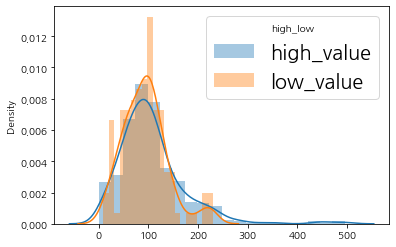

In [268]:
sns.distplot(high_values,label='high_value',bins=20)
sns.distplot(lower_values,label='low_value',bins=20)
plt.legend(title="high_low",fontsize=20)
plt.show()


In [269]:
high_cnt=[]
for i in upper_list:
    cnt_num=len(data_dict[i[0]]['Target'].values.tolist())
    high_cnt.append(cnt_num)

sum_high=0
for x in high_cnt:
    sum_high+=x
sum_high

lower_cnt=[]
for i in lower_list:
    cnt_num=len(data_dict[i[0]]['Target'].values.tolist())
    lower_cnt.append(cnt_num)

sum_low=0
for x in lower_cnt:
    sum_low+=x
sum_low

136

In [270]:
table=[[sum_low*2000-Target_low,Target_low],[sum_high*2000-Target_high,Target_high]]
table

[[259244, 12756], [925916, 52084]]

In [271]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

dof=1
[[257890.816  14109.184]
 [927269.184  50730.816]]
chi-square test
chisq:174.822
p:0.000
degree of freedom:1
expected_value::
[[257890.816  14109.184]
 [927269.184  50730.816]]


In [272]:
upper_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    upper_values.extend(Target_num)
print(len(upper_values))

lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)
print(len(lower_values))

489
136


In [273]:
from scipy import stats
t_result = stats.ttest_ind(lower_values,upper_values)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("2Sample ttest")
print("t:{}".format(t))
print("p:{}".format(p))

2Sample ttest
t:-2.073
p:0.039
